(test-functions:damped-cosine)=
# One-dimensional (1D) Damped Cosine Function

The 1D damped cosine function from Santner et al. {cite}`Santner2018` is
a scalar-valued test function for metamodeling exercises.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uqtestfuns as uqtf

A plot of the function is shown below for $x \in [0, 1]$.

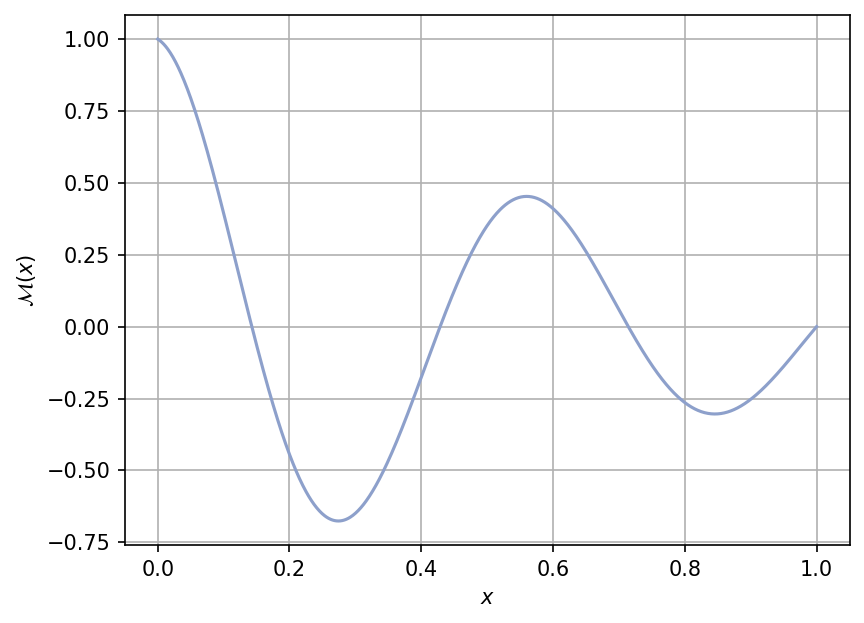

In [2]:
my_testfun = uqtf.DampedCosine()
lb = my_testfun.prob_input.marginals[0].lower
ub = my_testfun.prob_input.marginals[0].upper
xx = np.linspace(lb, ub, 1000)[:, np.newaxis]
yy = my_testfun(xx)

# --- Create the plot
plt.plot(xx, yy, color="#8da0cb")
plt.grid()
plt.xlabel("$x$")
plt.ylabel("$\mathcal{M}(x)$")
plt.gcf().tight_layout(pad=3.0)
plt.gcf().set_dpi(150);

## Test function instance

To create a default instance of the test function:

In [3]:
my_testfun = uqtf.DampedCosine()

Check if it has been correctly instantiated:

In [4]:
print(my_testfun)

Name              : DampedCosine
Spatial dimension : 1
Description       : One-dimensional damped cosine from Santner et al. (2018)


## Description

The test function is analytically defined as follows[^location]:

$$
\mathcal{M}(x) = e^{(-1.4 x)} \cos{(3.5 \pi x)},
$$
where $x$ is defined below.

## Probabilistic input

Based on {cite}`Santner2018`, the domain of the function is in $[0, 1]$.
In UQTestFuns, this domain can be represented as a probabilistic input model
using the uniform distribution shown in the table below.

In [5]:
my_testfun.prob_input

ProbInput(spatial_dimension=1, marginals=(UnivDist(distribution='uniform', parameters=array([0., 1.]), name='x', description='None'),), copulas=None, name='Santner2018', description='Input model for the one-dimensional damped cosine from Santner et al. (2018)')

## Reference results

This section provides several reference results of typical UQ analyses involving
the test function.

### Sample histogram

Shown below is the histogram of the output based on $100'000$ random points:

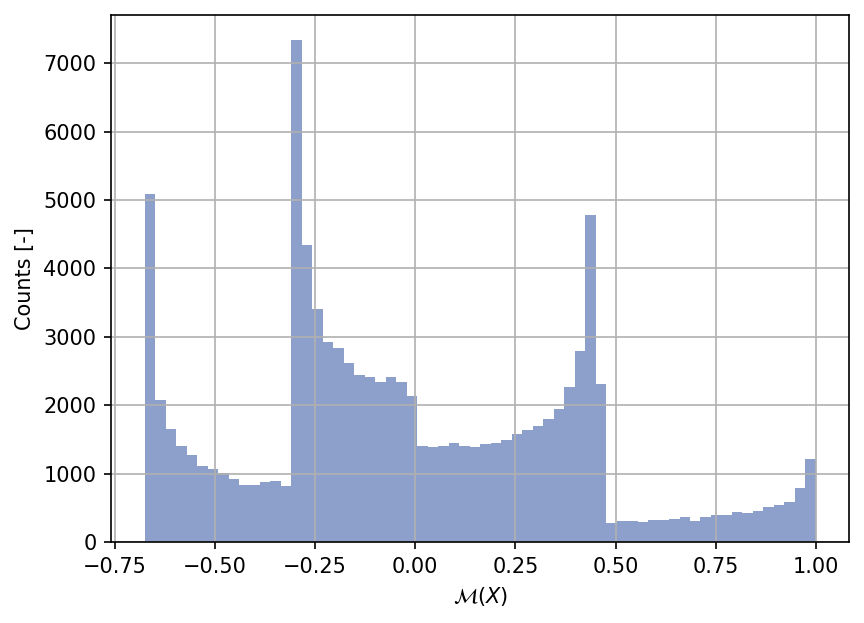

In [6]:
np.random.seed(42)
xx_test = my_testfun.prob_input.get_sample(100000)
yy_test = my_testfun(xx_test)

plt.hist(yy_test, bins="auto", color="#8da0cb");
plt.grid();
plt.ylabel("Counts [-]");
plt.xlabel("$\mathcal{M}(X)$");
plt.gcf().tight_layout(pad=3.0)
plt.gcf().set_dpi(150);

### Moment estimations

Shown below is the convergence of a direct Monte-Carlo estimation of
the output mean and variance with increasing sample sizes.

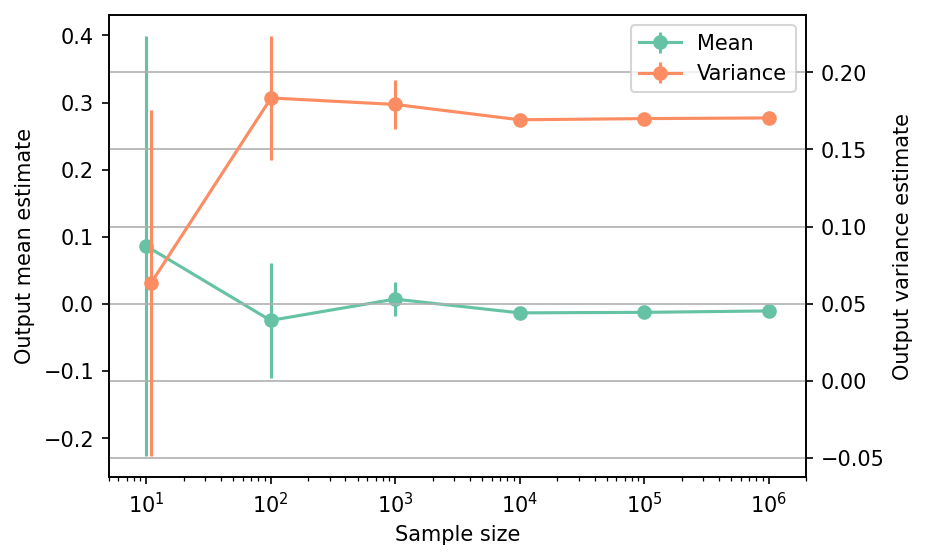

In [7]:
np.random.seed(42)
sample_sizes = np.array([1e1, 1e2, 1e3, 1e4, 1e5, 1e6], dtype=int)
mean_estimates = np.empty((len(sample_sizes), 50))
var_estimates = np.empty((len(sample_sizes), 50))

for i, sample_size in enumerate(sample_sizes):
    for j in range(50):
        xx_test = my_testfun.prob_input.get_sample(sample_size)
        yy_test = my_testfun(xx_test)
        mean_estimates[i, j] = np.mean(yy_test)
        var_estimates[i, j] = np.var(yy_test)

# --- Compute the error associated with the estimates
mean_estimates_errors = np.std(mean_estimates, axis=1)
var_estimates_errors = np.std(var_estimates, axis=1)

# --- Plot the mean and variance estimates
fig, ax_1 = plt.subplots(figsize=(6,4))

# --- Mean plot
ax_1.errorbar(
    sample_sizes,
    mean_estimates[:,0],
    yerr=2.0*mean_estimates_errors,
    marker="o",
    color="#66c2a5",
    label="Mean"
)
ax_1.set_xlim([5, 2e6])
ax_1.set_xlabel("Sample size")
ax_1.set_ylabel("Output mean estimate")
ax_1.set_xscale("log");
ax_2 = ax_1.twinx()

# --- Variance plot
ax_2.errorbar(
    sample_sizes+1,
    var_estimates[:,0],
    yerr=1.96*var_estimates_errors,
    marker="o",
    color="#fc8d62",
    label="Variance",
)
ax_2.set_ylabel("Output variance estimate")

# Add the two plots together to have a common legend
ln_1, labels_1 = ax_1.get_legend_handles_labels()
ln_2, labels_2 = ax_2.get_legend_handles_labels()
ax_2.legend(ln_1 + ln_2, labels_1 + labels_2, loc=0)

plt.grid()
fig.set_dpi(150)

The tabulated results for each sample size is shown below.

In [8]:
from tabulate import tabulate

# --- Compile data row-wise
outputs =[]

for (
    sample_size,
    mean_estimate,
    mean_estimate_error,
    var_estimate,
    var_estimate_error,
) in zip(
    sample_sizes,
    mean_estimates[:,0],
    2.0*mean_estimates_errors,
    var_estimates[:,0],
    2.0*var_estimates_errors,
):
    outputs += [
        [
            sample_size,
            mean_estimate,
            mean_estimate_error,
            var_estimate,
            var_estimate_error,
            "Monte-Carlo",
        ],
    ]

header_names = [
    "Sample size",
    "Mean",
    "Mean error",
    "Variance",
    "Variance error",
    "Remark",
]

tabulate(
    outputs,
    numalign="center",
    stralign="center",
    tablefmt="html",
    floatfmt=(".1e", ".4e", ".4e", ".4e", ".4e", "s"),
    headers=header_names
)

'<table>\n<thead>\n<tr><th style="text-align: center;"> Sample size </th><th style="text-align: center;">   Mean    </th><th style="text-align: center;"> Mean error </th><th style="text-align: center;"> Variance </th><th style="text-align: center;"> Variance error </th><th style="text-align: center;">  Remark   </th></tr>\n</thead>\n<tbody>\n<tr><td style="text-align: center;">   1.0e+01   </td><td style="text-align: center;">8.6711e-02 </td><td style="text-align: center;"> 3.1261e-01 </td><td style="text-align: center;">6.3458e-02</td><td style="text-align: center;">   1.1457e-01   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n<tr><td style="text-align: center;">   1.0e+02   </td><td style="text-align: center;">-2.4230e-02</td><td style="text-align: center;"> 8.5381e-02 </td><td style="text-align: center;">1.8342e-01</td><td style="text-align: center;">   4.1111e-02   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n<tr><td style="text-align: center;">   1.0e+03   </td><td style="text-align: center;">7.4678e-03 </td><td style="text-align: center;"> 2.5631e-02 </td><td style="text-align: center;">1.7922e-01</td><td style="text-align: center;">   1.6246e-02   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n<tr><td style="text-align: center;">   1.0e+04   </td><td style="text-align: center;">-1.3006e-02</td><td style="text-align: center;"> 8.1933e-03 </td><td style="text-align: center;">1.6927e-01</td><td style="text-align: center;">   3.9006e-03   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n<tr><td style="text-align: center;">   1.0e+05   </td><td style="text-align: center;">-1.2232e-02</td><td style="text-align: center;"> 2.6456e-03 </td><td style="text-align: center;">1.7003e-01</td><td style="text-align: center;">   1.2400e-03   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n<tr><td style="text-align: center;">   1.0e+06   </td><td style="text-align: center;">-1.0106e-02</td><td style="text-align: center;"> 7.8064e-04 </td><td style="text-align: center;">1.7047e-01</td><td style="text-align: center;">   4.2654e-04   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n</tbody>\n</table>'

## References

```{bibliography}
:style: unsrtalpha
:filter: docname in docnames
```

[^location]: see Example 3.3 in {cite}`Santner2018`.